In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from utils import constants as cnst
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pickle as pkl
#import glob


#pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))

In [5]:
(all_node_file['node1']).size

1624

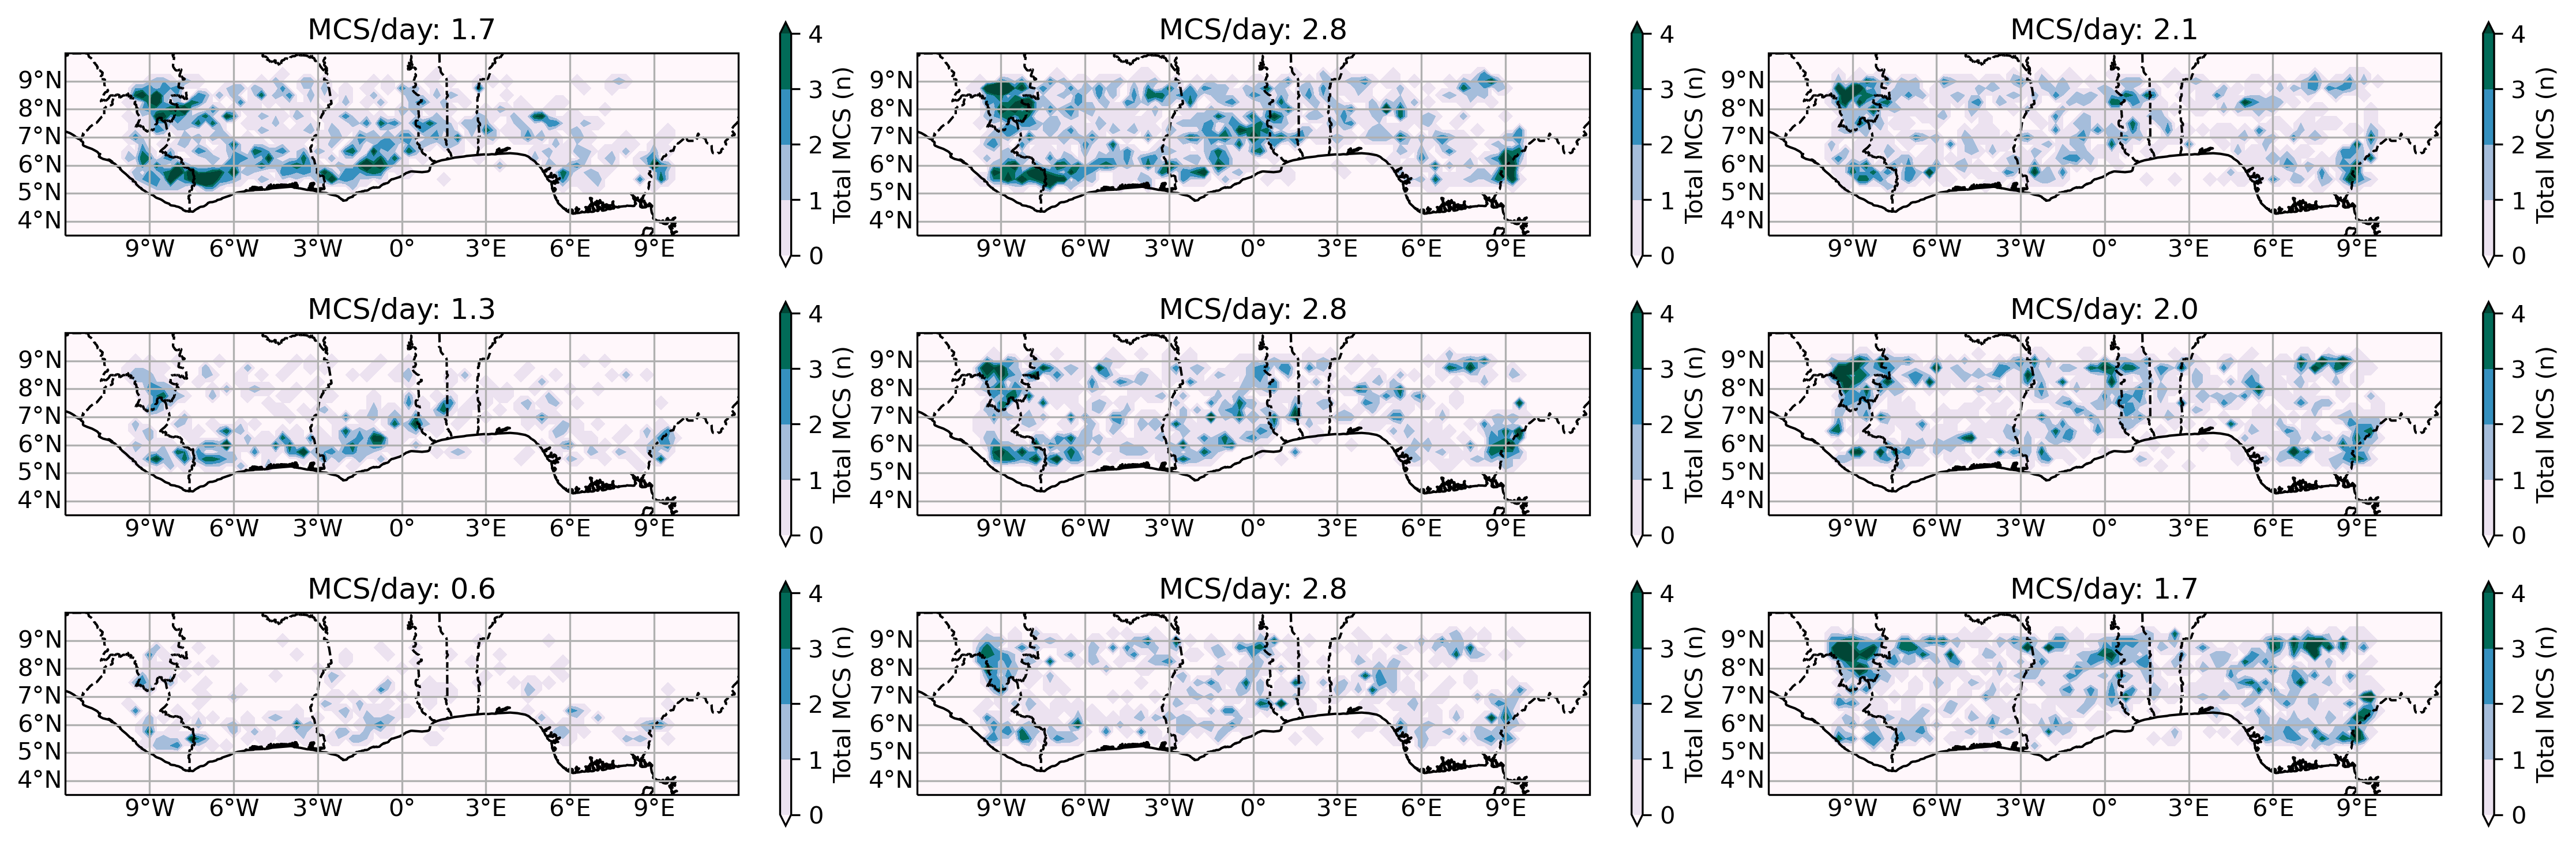

In [6]:
from utils import u_darrays as uda
f = plt.figure(figsize=(15,5), dpi=300)
mname = 'node'

for ids, m in enumerate(range(1,10)):
    
    
    pl_clim = xr.open_dataset(cnst.DATA + 'SOMS/saves/3x3_Nodes_fullYear/node1_ERA5_clim_mean_srfc.nc')
    #pl_clim = uda.flip_lat(pl_clim)
    pl_clim = pl_clim['cape'].sel(latitude=slice(3,10), longitude=slice(-12,12))
    pl_clim.values = pl_clim.values*0
    
    df = pd.read_csv(cnst.DATA + '/SOMS/saves/3x3_Nodes_fullYear/mcs_matchtable/node'+str(m)+'_MCS_matchTable_mergedNodes_5mmMCS_fullYear.csv', index_col=0, parse_dates=True)
    df = df.where(df.hour==18).dropna()
    anf = all_node_file['node'+str(m)]
    #ipdb.set_trace()
    anf = anf.where((anf.year>=2004)&(anf.year<=2015)).dropna()
    
    daycount = df.index.size/anf.size #*100 
    #ipdb.set_trace()

    for ix, dff in df.iterrows():

        xv = dff.lon
        yv = dff.lat

        loc = pl_clim.sel(longitude=xv, latitude=yv, method='nearest')
        xm, ym = np.meshgrid(pl_clim.longitude.values, pl_clim.latitude.values)
        ipos = np.where((xm==loc.longitude.values)&(ym==loc.latitude.values))
        try:
            pl_clim.values[ipos] = pl_clim.values[ipos]+1
        except:
            ipdb.set_trace()

    plots = pl_clim.values #/ anf.size *100
    
    ax = f.add_subplot(3,3,ids+1, projection=ccrs.PlateCarree())

    plt.contourf(pl_clim.longitude, pl_clim.latitude, plots, transform=ccrs.PlateCarree(), cmap='PuBuGn', extend='both', levels=np.arange(0,5))
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('MCS/day: '+str(np.round(daycount,1)))
    cbar = plt.colorbar()
    cbar.set_label('Total MCS (n)')
   
    
    
plt.tight_layout()
#f.savefig(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/2hOverlap/maps.png')
        
        